# Explore the wave package

In [48]:
import pylab as plt
import numpy as np
import ipywidgets as iw
import scipy.fftpack as ft

In [46]:
def package(t, z, D=1, T0=1, A0=1):
    z0 = - T0**2 / (2*D)
    a = 1 + 0*1j
    a *= A0 / np.sqrt(1 + 1j * z / z0)
    a *= np.exp(- t**2 / (T0**2 * (1 + (z/z0)**2)))
    a *= np.exp(- 1j * z/z0 * t**2 / (T0**2 * (1 + (z/z0)**2)))
    return a

In [93]:
times = np.linspace(-10, 10, 1000)

@iw.interact(z = iw.FloatSlider(min=0, max=2,step=0.01))
def plotit(z):
    plt.figure(figsize=(12, 4))
    plt.subplots_adjust(wspace=0.25)
    plt.subplot(121)
    plt.plot(times, np.real(package(times, z)))
    plt.plot(times, np.abs(package(times, z)), 'k--')
    plt.xlabel('$\\tau$')
    plt.subplot(122)
    plt.plot(times, np.imag(package(times, z)))
    plt.plot(times, np.abs(package(times, z)), 'k--')
    plt.xlabel('$\\tau$')

interactive(children=(FloatSlider(value=0.0, description='z', max=2.0, step=0.01), Output()), _dom_classes=('w…

## 1. b) local frequency

In [97]:
def local_freq(t, z=0, D=1, T0=1):
    z0 = T0**2 / (2*D)
    return z/z0 * (2*t) / (T0**2 * (1 + (z/z0)**2))

In [105]:
zs = np.linspace(0, 2, 100)

@iw.interact(D = iw.FloatSlider(min=-1, max=1, value=0.1))
def plotit(D):
    plt.plot(zs, local_freq(1, zs, D=D))

interactive(children=(FloatSlider(value=0.1, description='D', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

## 1. c) Spectrum

In [85]:
def fft_func(om, z, D=1, T0=1, A0=1):
    a = 1 + 0*1j
    a *= A0 * np.sqrt(T0**2 / 2)
    a *= np.exp(- om**2 * T0**2 / 4)
    a *= np.exp(1j * D/2 * om**2 * z)
    return a / np.sum(abs(a))

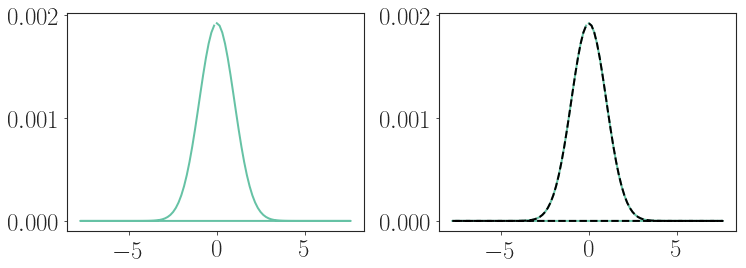

In [91]:
N = 100
times = np.linspace(-20, 20, N)
dt = times[1] - times[0]
oms = ft.fftfreq(N, d=dt/(2*np.pi))

plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)
plt.subplot(121)
fft_num = ft.fft(package(times, 0))
plt.plot(oms, abs(fft_num)**2 / np.sum(abs(fft_num))**2)
# plt.plot(times, np.abs(package(times, z)), 'k--')
# plt.xlabel('$\\tau$')
plt.subplot(122)
fft_num = ft.fft(package(times, 1))
plt.plot(oms, abs(fft_num)**2 / np.sum(abs(fft_num))**2)
plt.plot(oms, abs(fft_func(oms, 1))**2, 'k--')
# plt.plot(times, np.abs(package(times, z)), 'k--')
# plt.xlabel('$\\tau$')